# prediction using supervised ML-- Linear Regresssion 

### Step1 : importing the necessary libraries for analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn  as sns 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error

### STEP 2 :  getting the data

In [143]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [144]:
df = pd.read_csv(url)

### STEP3 : an overview of the data 

In [145]:
df.info() # checking for null entries , datatypes of of fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [146]:
df.describe(include = 'all') # descriptive satistics ( central tendencies , qunatiles , min ,max values etc) 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

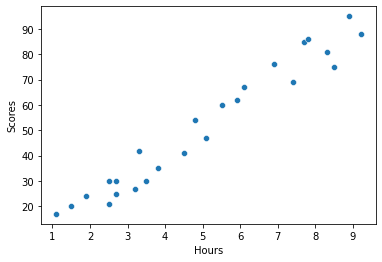

In [147]:
# visualtising the 2_d data using scatterplot 
sns.scatterplot(df['Hours'] , df['Scores'])

### STEP 4 : performing train_test_split and fitting the data to the model

In [148]:
X = df[['Hours']]
y = df['Scores']
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=101,test_size = 0.3)

In [149]:
linear_model = LinearRegression()
linear_model.fit(X_train , y_train)
predictions = linear_model.predict(X_test)

In [ ]:
m = linear_model.coef_[0]   # slope 
c  = linear_model.intercept_ # intercept 

### STEP 5  :   plotting  the 'best fit' line with the calculated slope and intercept term for the testing data 

<AxesSubplot:xlabel='Hours'>

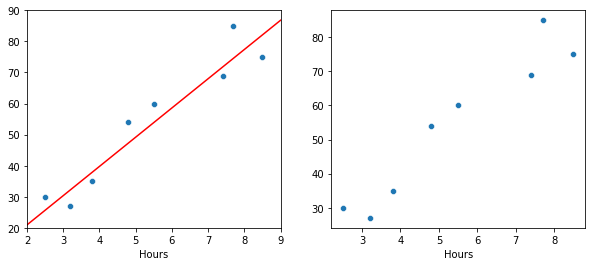

In [174]:
plt.figure(figsize  = (10,4))
plt.subplot(1 ,2 ,1 )
yhat = []
for  i in np.linspace(0 ,X_test['Hours'].max() , 10):  # generting linearly spaced values 
     yhat.append(m*i +c )
sns.scatterplot(X_test['Hours'], y_test.values)
plt.plot(yhat , color = 'r')
plt.xlim(2,9)
plt.ylim(20,90)
plt.subplot(1 ,2 ,2 )
sns.scatterplot(X_test['Hours'] , y_test.values)

In [198]:
# actual scores vs predicted scores 
df= pd.DataFrame({'Hours' : X_test['Hours'] ,'actual_score' : y_test.values ,'predicted_score' :  predictions})
df

,Hours,actual_score,predicted_score
16,2.5,30,27.018782
10,7.7,85,78.844662
22,3.8,35,39.975252
19,7.4,69,75.854708
7,5.5,60,56.918328
21,4.8,54,49.941767
2,3.2,27,33.995343
3,8.5,75,86.817875


### STEP 6  : checking the goodness of the fit 

Text(0.5, 0.98, 'residual analyisis')

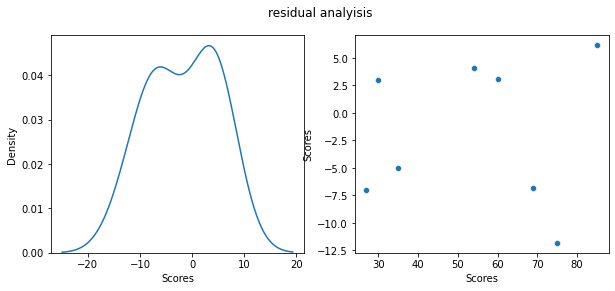

In [199]:
# residual analysis 
plt.figure(figsize=(10,4))
plt.subplot(1 ,2, 1  )
sns.kdeplot(y_test- predictions  , legend= 0)
plt.subplot(1 ,2 , 2 )
sns.scatterplot(y_test  ,y_test-predictions)
plt.suptitle('residual analyisis')

#####  the interpretation of the above is that the errors are showing a bell curve and 
##### the residual plot is not showing any spesific pattern , indicating the model is good 

In [202]:
# using RMSE , R2 score
from sklearn.metrics import mean_squared_error ,r2_score  
print(f'the root  mean square error is  {np.sqrt(mean_squared_error(y_test ,predictions))}') # closer to 0
print(f'the value of R2 metric for the fit is  {r2_score(y_test ,predictions)} ')
print(f'the variabiity captured by model  {np.round(r2_score(y_test , predictions)*100 ,2 )} %')

the root  mean square error is  6.452508476982333
the value of R2 metric for the fit is  0.8999124290533055 
the variabiity captured by model  89.99 %


### ANSWER 

In [205]:
# the final answer is if a student study's for 9.25 hours with 89.99% confidence  we can say that he / she
# will get a score 94.292

In [206]:
linear_model.predict([[9.25]])

array([94.29276126])